In [2]:
import pandas as pd
import scipy.stats as st
import numpy as np
import matplotlib.pyplot as plt
import math

In [3]:
n = 300
p = 0.5

In [4]:
t_stat_destr = st.binom(n, p)

H0 - новый интерфейс не принес изменений  
H1 - новый интерфейс принес изменения    

In [8]:
alpha = 0.05

In [9]:
t_stat_destr.ppf(1 - alpha)

164.0

In [10]:
observ = 167

In [12]:
(1 - t_stat_destr.cdf(observ))*100

2.156424963861081

## Бизнес-кейс  
Мы владеем сетью ресторанов в большом городе. Согласно собранной статистике, наш ежедневный средний чек составляет 1200. Менеджер одного из ресторанов принял некоторые изменения. За день работы этого ресторана были зафиксированы все заказы.  
Задача: оценить статистически и обосновать принятие одной из гипотез:  
H0: средний чек останется без изменений  
H1: средний чек увеличится

In [13]:
data = np.array([1350, 1420, 890, 1450, 1290, 1320, 1490, 1190, 1290, 1190, 1290, 1210,
        1220, 1590, 890, 1220, 1100, 1100, 1150, 1250, 1640, 1290, 1070, 990,
        1390, 1490, 1100, 1059, 1290, 950, 1059, 1170, 1265, 890, 1320, 1240,
        1180, 1300, 1090, 1100, 1360, 990, 1320, 1020, 1190, 1470, 1220, 1540,
        985, 1240, 1190, 1570, 1290, 1190, 780, 1290, 1350, 1291, 1190, 955,
        1290, 1320, 960, 1190, 1420, 1630, 1490, 1120, 890, 1440, 1050, 990,
        1150, 1199, 1190, 1290, 1320, 1150, 1390, 1059, 1090, 1255, 1059, 1150,
        1250, 1355, 1150, 1140, 1290, 1320, 985, 1290, 1460, 1155, 1090, 1150,
        990, 1290, 1470, 1390])

H0: mu = 1200  
H1: mu > 1200

In [15]:
avg = data.mean()  # Считаем среднее по выборке (средний чек)
avg

1220.81

In [18]:
alpha = 0.05  # задаем 
mu = 1200  # исходный средний чек
sigma = data.std()  # стандартное отклонение
n = len(data)  # число элементов выборки
se = sigma/math.sqrt(n)  # стандартная ошибка

In [21]:
t_stat_distr = st.norm(mu, se)  # экземпляр нормального распределения

In [34]:
x = np.linspace(mu - 4*se, mu + 4*se, 1000)  # генерация значений х в диапазоне 4 стандартных ошибок

In [ ]:
t_crit = t_stat_distr.ppf(1 - alpha)  # вычисление критического значения для заданного alpha

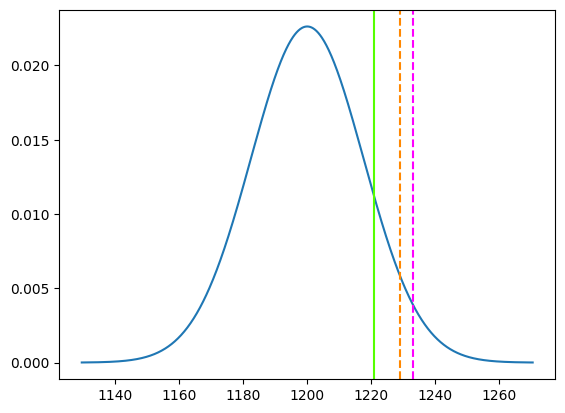

In [51]:
plt.plot(x, t_stat_distr.pdf(x))  # отрисовка плотности веротности (нормального распределения)
plt.axvline(t_crit, color='#F80', linestyle='--')  # отрисовка границы (критического значения)
plt.axvline(avg, color='#5F0')  # отрисовка наблюдения

In [47]:
p = (1-t_stat_distr.cdf(avg))  # вычисление P-значения
p

0.11901270348751547

Если P-value < alpha - принимаем альтернативную гипотезу H1  
Если P-value > alpha - принимаем основную гипотезу H0